In [204]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# explore the data

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
'''
column descriptions:
survival: whether passenter survived 1=survived, 0=died
pclass: class of the ticket
sex: sex of passenger
Age: age of passenger
sibsp: number of siblings and/or spouses of passenger
parch: number of parents/children of passenger
ticket: ticket number
fare: ticket price
Cabin: cabin number
embarked: embarkation port
'''

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data is highly imbalanced and will need to be balanced before implementing any machine learning algorithms on it.

# Visualize the data

/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

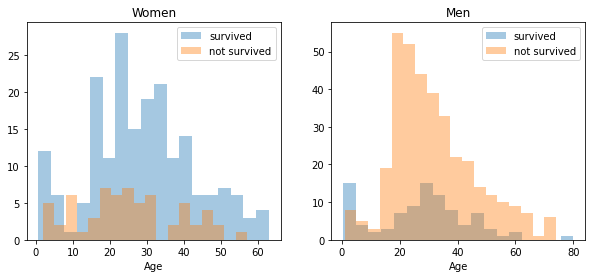

In [207]:
import seaborn as sns
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Women')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Men')

The above plots show the survival numbers of men and women by age. The distributions shown imply that "women and children first" was probably the procedure for loading the lifeboats as survivors outnumbered non-survivors for most bins on the "Women" plot and the only such bin in the "Men" plot was the youngest age.

/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


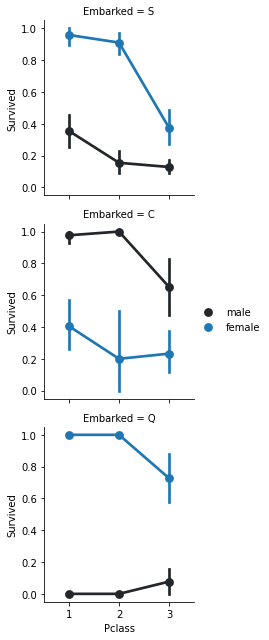

In [208]:
# Embarked and Sex

FacetGrid = sns.FacetGrid(train, row='Embarked', aspect=1)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FacetGrid.add_legend()

An interesting observation here is how the survival of men and women inverts for Embarkation point C.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

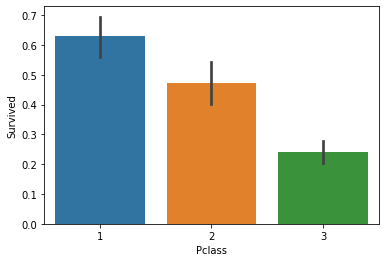

In [209]:
# Survival vs passenger class Pclass

sns.barplot(x='Pclass', y='Survived', data=train)

As would be expected, the higher classes were more likely to survive as they were probably either given evacuation precedence or their cabins were placed in better places to be evacuated.

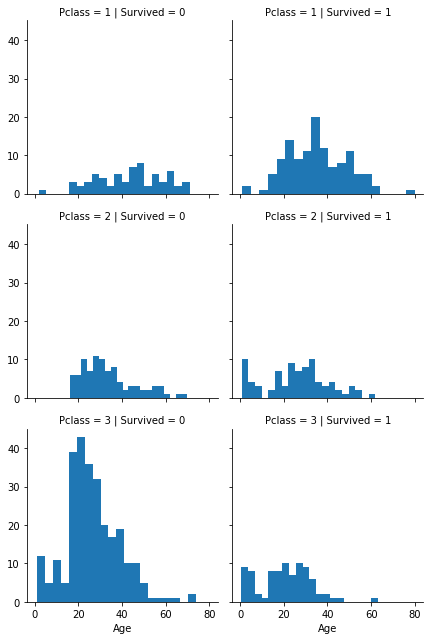

In [210]:
grid = sns.FacetGrid(train, row='Pclass', col='Survived')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

This backs up the thought that the survivability was highly dependent on class, especially with class 3 passengers being significantly less likely to survive.

In [211]:
# defining new feature
# I will define a feature relatives which is the addition of Sibsp and Parch to count total relatives on ship
# I will also make an 'alone' feature to mark whether or not a person had relatives at all (boolean)

data = [train, test]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives']>0, 'alone'] = 0
    dataset.loc[dataset['relatives']==0, 'alone'] = 1

train['alone'].value_counts()

1.0    537
0.0    354
Name: alone, dtype: int64

Plot to investigate any correlation between number of relatives and survival likelihood

/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eric/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  war

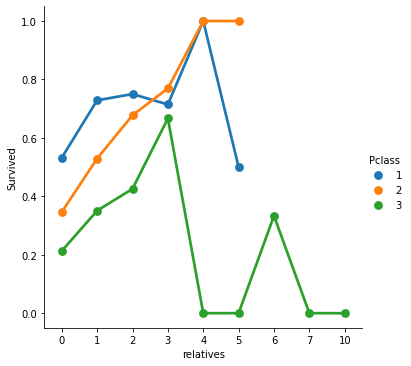

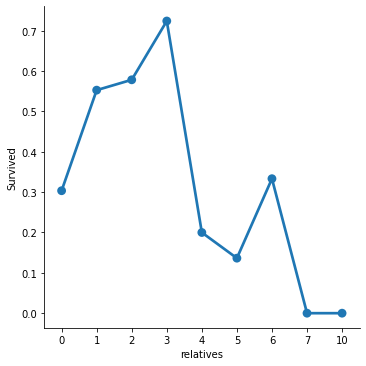

In [212]:
survival_with_relatives_class = sns.factorplot('relatives', 'Survived', hue='Pclass', data=train, ci=None)
survival_with_relatives = sns.factorplot('relatives', 'Survived', data=train, ci=None)

The top plot is the survival probability as a function of the number or relatives split up by class and the bottom plot is the total survival probability for all passengers.

# Data preprocessing

First I am going to look through the data and find columns with midding data.

In [213]:
# Make a new dataframe that has the feature name, number missing and percent missing as columns.

for dataset in data:
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
    percent_2 = (round(percent_1, 1).sort_values(ascending=False))
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
alone,0,0.0
relatives,0,0.0


In [214]:
# With 78% of the cabin values missing, I will drop that feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [215]:
# I will be imputing the missing ages with values based on the average and standard deviation of the passenger ages
import numpy as np

data = [train, test]
for dataset in data:
    mean_age = dataset['Age'].mean()
    std_dev_age = dataset['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean_age - std_dev_age, mean_age + std_dev_age, size=is_null)

    age = dataset['Age'].copy()
    age[np.isnan(age)] = rand_age
    dataset['Age'] = age
    dataset['Age'] = dataset['Age'].astype(int)

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
relatives      0
alone          0
dtype: int64

In [216]:
# I will fill in the missing Embarked values with the most common, since there are only two missing values
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [217]:
most_common_embarked = 'S'

data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common_embarked)

In [218]:
train['Embarked'].isnull().sum()

0

In [219]:
# Converting datatypes of features
# Drop "Name" because it is causing problems and won't affect the models
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  alone        891 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [220]:
# Want to convert alone to int

train['alone'] = train['alone'].astype(int)
test['alone'] = test['alone'].astype(int)


# Convert all features to be categorical

In [221]:
# Extract titles from names and categorize
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [222]:
# Convert 'Sex' to numeric

sexes = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sexes)

In [223]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Title
0,1,0,3,0,22,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,1,38,1,0,PC 17599,71.2833,C,1,0,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7.9250,S,0,1,2
3,4,1,1,1,35,1,0,113803,53.1000,S,1,0,3
4,5,0,3,0,35,0,0,373450,8.0500,S,0,1,1


In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  relatives    891 non-null    int64  
 11  alone        891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 90.6+ KB


In [225]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [226]:
# Too many unique tickets to meaningfully categorize. I will drop it

train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [227]:
# turn ports into numerics

ports = {"S": 0, "C": 1, "Q": 2}

train['Embarked'] = train['Embarked'].map(ports)
test['Embarked'] = test['Embarked'].map(ports)

In [229]:
# Categorize age

data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# check age categories
train['Age'].value_counts()

6    162
4    161
5    149
3    133
2    121
1     97
0     68
Name: Age, dtype: int64

In [230]:
# After some investigating, I decided to divide the fare into 6 quantiles

pd.qcut(test['Fare'], 6)

0         (7.758, 8.662]
1        (-0.001, 7.758]
2        (8.662, 14.454]
3         (7.758, 8.662]
4        (8.662, 14.454]
             ...        
413       (7.758, 8.662]
414    (56.144, 512.329]
415      (-0.001, 7.758]
416       (7.758, 8.662]
417       (14.454, 26.0]
Name: Fare, Length: 418, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.758] < (7.758, 8.662] < (8.662, 14.454] < (14.454, 26.0] < (26.0, 56.144] < (56.144, 512.329]]

In [231]:
# Categorize fares into quantiles and substitute 0 for NaN
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [233]:
# print(train['Embarked'].isnull().sum())
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Title
0,892,3,0,5,0,0,0,2,0,1,1
1,893,3,1,6,1,0,0,0,1,0,3
2,894,2,0,6,0,0,1,2,0,1,1
3,895,3,0,3,0,0,1,0,0,1,1
4,896,3,1,2,1,1,1,0,2,0,3


In [234]:
train.to_csv('preprocessed_train.csv')
test.to_csv('preprocessed_test.csv')

# Building models

In [269]:
# separating features from labels
from sklearn.model_selection import train_test_split

train_preprocessed = pd.read_csv('preprocessed_train.csv')

x = train_preprocessed.drop(["Survived"], axis=1)
y = train_preprocessed['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [270]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import pipeline

In [282]:
# SGD Classifier
sgd = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier())

sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
acc_sgd = sgd.score(x_test, y_test)

In [283]:
# Random forests

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc_rf = rf.score(x_test, y_test)

In [284]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)
acc_logreg = logreg.score(x_test, y_test)

/home/eric/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [285]:
# K nearest neighbor

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc_knn = knn.score(x_test, y_test)

In [286]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
acc_gnb = gnb.score(x_test, y_test)

In [287]:
# Perceptron

perc = Perceptron()
perc.fit(x_train, y_train)
pred = perc.predict(x_test)
acc_perc = perc.score(x_test, y_test)

In [288]:
# Linear SVM

svm = LinearSVC()
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
acc_svm = svm.score(x_test, y_test)

/home/eric/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [289]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
acc_dt = dt.score(x_test, y_test)

# Find the best model

In [293]:
results = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent', 'Random Forest', 'Logistic Regression', 
              'K Nearest Neighbor', 'Gaussian Naive Bayes', 'Perceptron', 
              'Support Vector Machine', 
              'Decision Tree'],
    'Score': [acc_sgd, acc_rf, acc_logreg, 
              acc_knn, acc_gnb, acc_perc, 
              acc_svm, acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.832402,Random Forest
0.826816,Logistic Regression
0.821229,Gaussian Naive Bayes
0.782123,Support Vector Machine
0.776536,Decision Tree
0.737430,Stochastic Gradient Descent
0.636872,K Nearest Neighbor
0.631285,Perceptron
